In [2]:
import torch 
import numpy as np
import torch.nn as nn 
import torch.nn.functional as F
import scanpy as sc
import pandas as pd
import loompy as lm
import scanpy.external as sce

import igraph
import louvain

from datetime import datetime
from time import time

import sklearn.neural_network as sknn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise

import matplotlib.pyplot as plt

In [3]:
#Import data

filename="/Users/aobal/Documents/Research/Data/Wagner2018/WagnerScience2018.loom"

adata=sc.read_loom(filename)

In [3]:
adata

AnnData object with n_obs × n_vars = 63530 × 30677
    obs: 'ClusterID', 'ClusterName', 'TimeID', 'TissueID', 'TissueName', 'batch', 'cell_names', 'keep.cell_pp1', 'library_id', 'n_counts', 'unique_cell_id'
    var: 'keep.gene_pp1'
    obsm: 'X_pca'

In [4]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

# sc.pl.highest_expr_genes(adata, n_top=20, )
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [5]:
# sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
# sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [6]:
adata = adata[adata.obs['keep.cell_pp1']==1,adata.var['keep.gene_pp1']==1]

In [7]:
adata.var.keys()

Index(['keep.gene_pp1', 'n_cells'], dtype='object')

In [7]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/aobal/opt/miniconda3/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [8]:
sc.pp.log1p(adata)

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

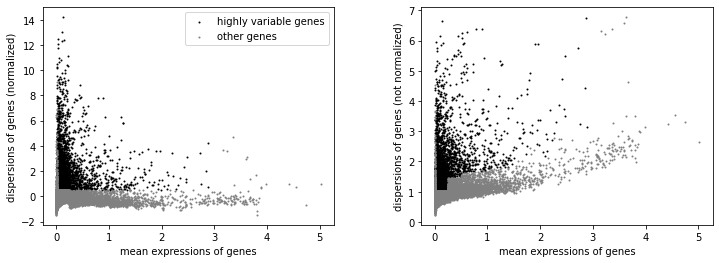

In [11]:
sc.pl.highly_variable_genes(adata)

In [61]:
adata.var['highly_variable']
# adata = adata[:, adata.var.highly_variable]

LOC100000009    False
LOC100000058    False
LOC100000094    False
LOC100000098    False
LOC100000110    False
                ...  
zyg11           False
zymnd12         False
zyx              True
zzef1           False
zzz3            False
Name: highly_variable, Length: 28938, dtype: bool

In [ ]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [10]:
sc.tl.pca(adata, use_highly_variable=True, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [11]:
sc.tl.leiden(adata)


In [13]:
pca_feat=np.genfromtxt("Wagner2018_PCA_Embeddings.tsv", delimiter="\t", dtype="double")

umap_feat=np.genfromtxt("Wagner2018_UMAP_Embeddings.tsv", delimiter="\t", dtype="double")

fa2_feat=np.genfromtxt("Wagner2018_FA2_Embeddings.tsv", delimiter="\t", dtype="double")

dm_feat=np.genfromtxt("Wagner2018_DM_Embeddings.tsv", delimiter="\t", dtype="double")

phate_feat=np.genfromtxt("Wagner2018_PHATE_Embeddings.tsv", delimiter="\t", dtype="double")


# Generate Ground Truth Embedding and Time

In [12]:
startTime = datetime.now()
sc.tl.tsne(adata)
tsneTime = datetime.now()-startTime

In [24]:
startTime = datetime.now()
sc.tl.tsneap(adata)
umapTime = datetime.now()-startTime

In [14]:
startTime = datetime.now()
sc.tl.draw_graph(adata)
fleTime = datetime.now()-startTime

In [15]:
startTime = datetime.now()
sc.tl.diffmap(adata)
dmTime = datetime.now()-startTime

In [16]:
startTime = datetime.now()
sce.tl.phate(adata)
phateTime = datetime.now()-startTime

In [337]:
startTime = datetime.now()
d = sce.tl.palantir(adata)
d.process()
palantirTime = datetime.now()-startTime

ValueError: Did not find adata.var['highly_variable']. Either your data already only consists of highly-variable genes or consider running `pp.highly_variable_genes` first.

In [39]:
# if 'highly_variable' not in adata.var.keys():
#     print('ok something is up')
    
    
# str(phateTime.seconds)

TypeError: str() takes at most 3 arguments (4 given)

In [15]:
print("Umap time: {}\nFLE time: {}\nDiffmap time: {}\nPHATE time: {}\n".format(
    umapTime.microseconds,
    fleTime.microseconds,
    dmTime.microseconds, 
    phateTime.microseconds))
# print("Umap time: {}\nFLE time: {}\nDiffmap time: {}\nPHATE time: {}\nPalantir time: {}\n" % (umapTime,fleTime,dmTime,
#                                        phateTime,palantirTime))

NameError: name 'umapTime' is not defined

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

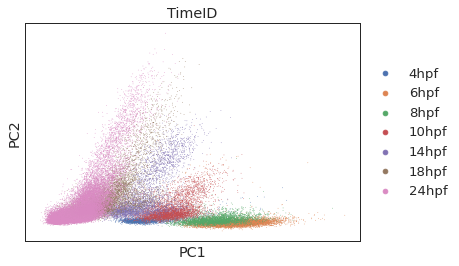

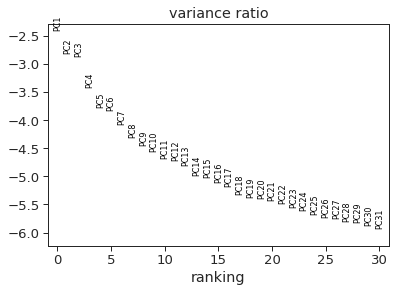

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

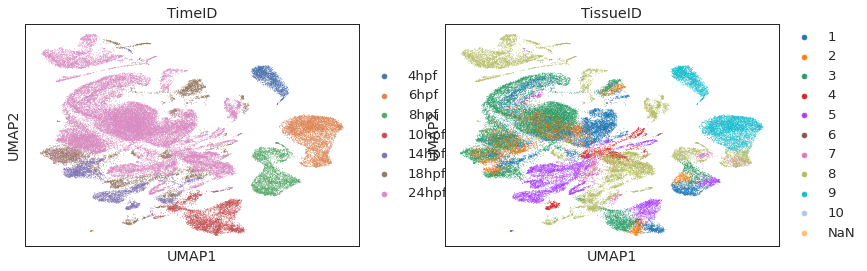

In [63]:
sc.pl.pca(adata, color='TimeID')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pl.umap(adata, color=['TimeID', 'TissueID'])

In [338]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['TimeID'] == '4hpf')[0]


sc.tl.dpt(adata)

In [339]:
sc.tl.louvain(adata, resolution=1.0)
sc.tl.paga(adata, groups='louvain')

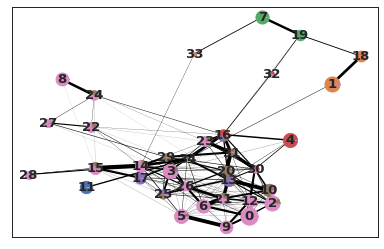

In [340]:
sc.pl.paga(adata, color="TimeID")

In [47]:
np.savetxt("Wagner2018_PCA_Embeddings.tsv",
           adata.obsm['X_pca'],
           delimiter="\t")

np.savetxt("Wagner2018_UMAP_Embeddings.tsv",
           adata.obsm['X_umap'],
           delimiter="\t")

np.savetxt("Wagner2018_FA2_Embeddings.tsv",
           adata.obsm['X_draw_graph_fa'],
           delimiter="\t")

np.savetxt("Wagner2018_DM_Embeddings.tsv",
           adata.obsm['X_diffmap'],
           delimiter="\t")

np.savetxt("Wagner2018_PHATE_Embeddings.tsv",
           adata.obsm['X_phate'],
           delimiter="\t")

In [17]:
# plt.figure(1)
sc.pl.umap(adata, color='TimeID')

plt.figure(2)
sc.pl.diffmap(adata, color='TimeID')


sc.pl.draw_graph(adata, color='TimeID')

sce.pl.phate(adata, color='TimeID')

... storing 'ClusterID' as categorical
... storing 'ClusterName' as categorical
... storing 'TimeID' as categorical
... storing 'TissueID' as categorical
... storing 'TissueName' as categorical
... storing 'batch' as categorical
... storing 'cell_names' as categorical
... storing 'library_id' as categorical


KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['X_pca', 'X_draw_graph_fa', 'X_diffmap', 'X_phate']."

In [52]:
np.savetxt("Wagner2018_ClusterID.tsv",
           adata.obs['ClusterID'],
           delimiter="\t", )

In [18]:
# type(adata.obs['ClusterID'])
np.random.seed(42)
subadata = adata[np.random.randint(low=1,high=adata.shape[0],
                                   size=int(np.round(0.1*adata.shape[0])))]

subadata

View of AnnData object with n_obs × n_vars = 5946 × 28938
    obs: 'ClusterID', 'ClusterName', 'TimeID', 'TissueID', 'TissueName', 'batch', 'cell_names', 'keep.cell_pp1', 'library_id', 'n_counts', 'unique_cell_id', 'n_genes', 'leiden'
    var: 'keep.gene_pp1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'draw_graph', 'diffmap_evals'
    obsm: 'X_pca', 'X_draw_graph_fa', 'X_diffmap', 'X_phate'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [78]:
#  subadata.obsm['X_draw_graph_fa']

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [32]:
#Build Regressor Model + Utils

#Define Regressor
Net=sknn.MLPRegressor(hidden_layer_sizes=(100,75,50,25),
                     activation='relu',
                     solver='sgd',
                     learning_rate_init=0.001, 
                     max_iter=1000, verbose=False)

#Scaler
scaler=MinMaxScaler(feature_range=(-10,10))



# Define Qualitative Evaluation Tools
def PlotEmbeddCorr(y_emb,y_pred):
    plt.subplot(121)
    plt.scatter(y_emb[:,0],y_pred[:,0], 
            s=0.3)
    plt.title('1st Feature gt vs pred')

    plt.subplot(122)
    plt.scatter(y_emb[:,1],y_pred[:,1], 
                s=0.3)
    plt.title('2nd Feature gt vs pred')
    
def PlotEmbedd(y_emb,y_pred):
    plt.subplot(121)
    plt.scatter(y_emb[:,0],y_emb[:,1], 
            s=0.3)
    plt.title('Ground Truth')
    
    plt.subplot(122)
    plt.scatter(y_pred[:,0],y_pred[:,1], 
                s=0.3)
    plt.title('MLPR Predicted')


In [33]:
# 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap', 'X_phate'
Input_Value = 'X_pca'
Input_Target = 'X_umap'
Input_object=subadata
Input_object_full=adata
# Input_AnaTool = sce.tl.phate
Input_AnaTool = sc.tl.umap

# Input_Value_scaled=scaler.fit_transform(Input_Value)
# Input_Target_scaled=scaler.fit_transform(Input_Target)

# X_full, X_sub, y_full, y_sub = train_test_split(
#     Input_Target, Input_Value, test_size=0.1, random_state=42)


In [34]:
# RUNTIME EXPERIMENT


#start timer
startTime = time()

#Analytical computation of subset
sc.pp.neighbors(Input_object)
Input_AnaTool(Input_object)

subanalMS = time()

#Split subset to train/test for internal diagnostics
X_train, X_test, y_train, y_test = train_test_split(
    Input_object.obsm[Input_Value], Input_object.obsm[Input_Target], test_size=0.1, random_state=42)

#Scale data
X_full_scaled=scaler.fit_transform(Input_object_full.obsm[Input_Value])
y_full_scaled=scaler.fit_transform(Input_object_full.obsm[Input_Target])
X_train_scaled=scaler.fit_transform(X_train)
y_train_scaled=scaler.fit_transform(y_train)
X_test_scaled=scaler.fit_transform(X_test)
y_test_scaled=scaler.fit_transform(y_test)

midplMS = time()

#Fit regression model
Net.fit(X_train_scaled,y_train_scaled)

TrainMS = time()

#Predict for full dataset
y_pred_full = Net.predict(X_full_scaled)

PredMS = time()

#end timer
targMLPRMS = time()





In [35]:
subanalTime = subanalMS - startTime
midplTime = midplMS - subanalMS
TrainTime = TrainMS - midplMS
PredTime = PredMS - TrainMS
targMLPRTime = targMLPRMS - startTime

# print(startTime.microseconds)
# print(subanalTime.microseconds)
# print(midplTime.microseconds)
# print(TrainTime.microseconds)
# print(PredTime.microseconds)
# print(targMLPRTime.microseconds)

print('Sub-Analysis time: {}\nMid-Processing Time: {}\nTraining time: {}\nPrediction Time: {}\nTotal MLPR Time: {}'.format(
    subanalTime,
    midplTime,
    TrainTime,
    PredTime,
    targMLPRTime
))

Sub-Analysis time: 10.165065050125122
Mid-Processing Time: 0.13872885704040527
Training time: 16.232815265655518
Prediction Time: 0.12452888488769531
Total MLPR Time: 26.66117000579834


In [331]:
print(targMLPRTime.microseconds)
print(Net.loss_)
# fleMLPRTime = targMLPRTime

800278
0.10044430923147224


In [332]:
# X_test_scaled=scaler.fit_transform(X_test)
# y_test_scaled=scaler.fit_transform(y_test)
# y_full_scaled=scaler.fit_transform(Input_object_full.obsm[Input_Target])

In [ ]:
# print(targMLPRTime.microseconds)
y_pred1 = Net.predict(X_test_scaled)
y_pred2 = Net.predict(X_train_scaled)
y_pred_full = Net.predict(X_full_scaled)

TestCosScore = pairwise.cosine_similarity(y_pred1,y_test_scaled)
TrainCosScore = pairwise.cosine_similarity(y_pred2,y_train_scaled)
FullCosScore = pairwise.cosine_similarity(y_pred_full,y_full_scaled)


In [ ]:

print("Training score: {}\nTesting score: {}\nFull Set Score: {}".format(
    Net.score(X_train_scaled,y_train_scaled),
    Net.score(X_test_scaled,y_test_scaled),
    Net.score(X_full_scaled,y_full_scaled)))


print("Training similarity: {}\nTesting similarity: {}\nFull Set similarity: {}".format(
    TestCosScore,
    TrainCosScore,
    FullCosScore))


print("Training size: {}\nTesting size: {}\nFull Set size: {}".format(
    X_train_scaled.shape[0],
    X_test_scaled.shape[0],
    X_full_scaled.shape[0]))


# Test GT vs Test predicted (from Subsample)
plt.figure(1)
p1=PlotEmbeddCorr(y_test_scaled,y_pred1)

# Train GT vs Train predicted (from Subsample)
plt.figure(2)
p2=PlotEmbeddCorr(y_train_scaled,y_pred2)

# Full Set GT vs Full Set predicted (Full Set)
plt.figure(3)
p3=PlotEmbeddCorr(y_full_scaled,y_pred_full)

# plt.show()



# Test GT vs Test predicted (from Subsample)
plt.figure(4)
p4=PlotEmbedd(y_test_scaled,y_pred1)

# Train GT vs Train predicted (from Subsample)
plt.figure(5)
p5=PlotEmbedd(y_train_scaled,y_pred2)

# Full Set GT vs Full Set predicted (Full Set)
plt.figure(6)
p6=PlotEmbedd(y_full_scaled,y_pred_full)


In [196]:
###### FEATURE GENERATION - pseudotime

# start_cell = 'Run5_164698952452459'
adata.uns['iroot'] = np.flatnonzero(adata.obs['TimeID'] == '4hpf')[0]


sc.tl.paga(adata)
sc.tl.dpt(adata)



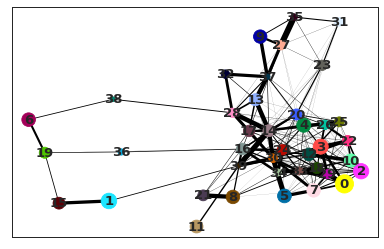

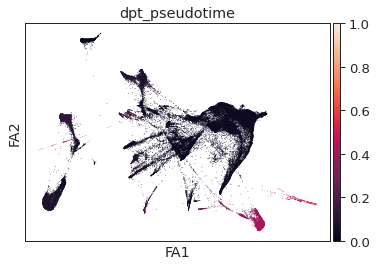

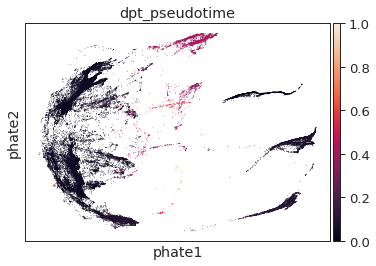

In [191]:
sc.pl.paga(adata)

sc.pl.draw_graph(adata, color='dpt_pseudotime')

sce.pl.phate(adata, color='dpt_pseudotime')



In [187]:
adata

AnnData object with n_obs × n_vars = 59461 × 28938
    obs: 'ClusterID', 'ClusterName', 'TimeID', 'TissueID', 'TissueName', 'batch', 'cell_names', 'keep.cell_pp1', 'library_id', 'n_counts', 'unique_cell_id', 'n_genes', 'leiden', 'dpt_pseudotime'
    var: 'keep.gene_pp1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'draw_graph', 'diffmap_evals', 'ClusterID_colors', 'TimeID_colors', 'TissueID_colors', 'iroot', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap', 'X_phate'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'